In [1]:
import EddyDetectionV2 as eddy
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.colors import SymLogNorm
from tqdm import tqdm
import ast
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import matplotlib.colors as colors
import json
import matplotlib.cm as cm
import gsw
# from read_eddyIDRegion import load_eddyIDRegions

# Set default font size to match LaTeX document
plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 12 # Figure title size
})

config_regrid_FWT = False

# Import data

In [2]:
from pathlib import Path

def get_file_size(file_path):
    file_size_bytes = Path(file_path).stat().st_size
    if file_size_bytes < 1024:
        return f"{file_size_bytes} B"
    elif file_size_bytes < 1024**2:
        return f"{file_size_bytes / 1024:.2f} KB"
    elif file_size_bytes < 1024**3:
        return f"{file_size_bytes / 1024**2:.2f} MB"
    else:
        return f"{file_size_bytes / 1024**3:.2f} GB"

file_path = '/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc'
print(f"File size: {get_file_size(file_path)}")

import netCDF4 as nc

# Open NetCDF file using netCDF4
ds_nc = nc.Dataset('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc')

# Extract variable data excluding coordinates
data_vars = {}
for var_name, nc_var in ds_nc.variables.items():
    if var_name not in ds_nc.dimensions:
        data_vars[var_name] = (nc_var.dimensions, np.array(nc_var))

# Extract coordinate data
coords = {}
for coord_name, nc_coord in ds_nc.dimensions.items():
    coords[coord_name] = np.array(ds_nc.variables[coord_name])

# Extract global attributes
attrs = {attr: ds_nc.getncattr(attr) for attr in ds_nc.ncattrs()}

# Create xarray Dataset with extracted information
ds_xr = xr.Dataset(data_vars=data_vars, coords=coords, attrs=attrs)

# Display the converted xarray.Dataset
print(ds_xr)

JMREI = ds_xr['EddyID'].sel(Y=slice(70, 74), X=slice(-22, 0))
display(JMREI)

File size: 2.26 GB
<xarray.Dataset> Size: 346MB
Dimensions:  (Y: 231, X: 510, time: 365)
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 -21.82 ... 1.879 1.936 1.994
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 74.89 74.92 74.95 74.99
  * time     (time) int64 3kB 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
Data variables:
    XC       (Y, X) float64 942kB -21.98 -21.93 -21.87 ... 1.879 1.936 1.994
    YC       (Y, X) float64 942kB 70.01 70.01 70.01 70.01 ... 74.99 74.99 74.99
    Z        float64 8B -1.0
    EddyID   (time, Y, X) object 344MB '0' '0' '0' '0' '0' ... '0' '0' '0' '0'


<xarray.DataArray 'EddyID' (time: 365, Y: 198, X: 473)> Size: 273MB
array([[['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
...
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']]], dtype=object)
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
  * time     (time) int64 3kB 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364

In [3]:
JMREI = JMREI.where(JMREI != '0')
display(JMREI)

<xarray.DataArray 'EddyID' (time: 365, Y: 198, X: 473)> Size: 273MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=object)
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
  * time     (time) int64 3kB 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364

In [4]:
JMFZ_region = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWT/JMFZFWT.nc')['shelfExtended'].assign_attrs(
    units="mSv", description="Freshwater transport"
).rename('FWT_70_74N')
eddyRegion = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Eddies_fullYear.nc')['EddyDetection'].sel(Y=slice(70,74),X=slice(-22,0))
eddyRegion.attrs = {}
eddyRegion = eddyRegion.assign_attrs(
    unit="Eddy type (1 == anti-cyclonic, 2 == cyclonic)", description="Outermost closed SSH defined eddy region"
)

depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(70,74),X=slice(-22,0))
depth_no_nan = depth

depth = depth.where(depth > 0, np.nan)

FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(70,74)).sel(X=slice(-22,0))
FWC = FWC.resample(time='D').mean(dim='time').rename('FWC')

area = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/rA.nc')['rA'].sel(Y=slice(70,74),X=slice(-22,0))

In [5]:
if config_regrid_FWT:    
    XC_mask = JMFZ_region.XC
    YC_mask = JMFZ_region.YC

    cond_bound = xr.ones_like(eddyRegion[0], dtype=bool)

    for x, y in zip(XC_mask, YC_mask):
        cond_bound.loc[{"X": x, "Y": y}] = False
    eddyRegion_easternboundary = eddyRegion.where(~cond_bound)

    FWT_restructure = xr.zeros_like(eddyRegion_easternboundary)

    for time,data in tqdm(enumerate(JMFZ_region),total=len(JMFZ_region),desc='Regridding'):
        for mooring in data:
            XC = mooring.XC
            YC = mooring.YC
            FWT_restructure[time].loc[{"X":XC,"Y":YC}] = mooring.values

In [6]:
if config_regrid_FWT:
    FWT_restructure = FWT_restructure.rename('Jan Mayen region FWT')
    FWT_restructure.attrs = {}
    FWT_restructure = FWT_restructure.assign_attrs(
    unit="mSv", description="Freshwater transport in milli-Sverdrup (m^3s^-1*1e-1000)"
    )
    FWT_restructure.to_netcdf('/nird/projects/NS9608K/MSc_EK/Data/FWT/JMFZFWT_regrid.nc')
else:
    FWT_restructure = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/FWT/JMFZFWT_regrid.nc')['Jan Mayen region FWT']

In [7]:
display(FWT_restructure)

<xarray.DataArray 'Jan Mayen region FWT' (time: 365, Y: 198, X: 473)> Size: 273MB
[34183710 values with dtype=float64]
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
    XC       (Y, X) float64 749kB ...
    YC       (Y, X) float64 749kB ...
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B ...
Attributes:
    unit:         mSv
    description:  Freshwater transport in milli-Sverdrup (m^3s^-1*1e-1000)

(-20.0, -7.5)

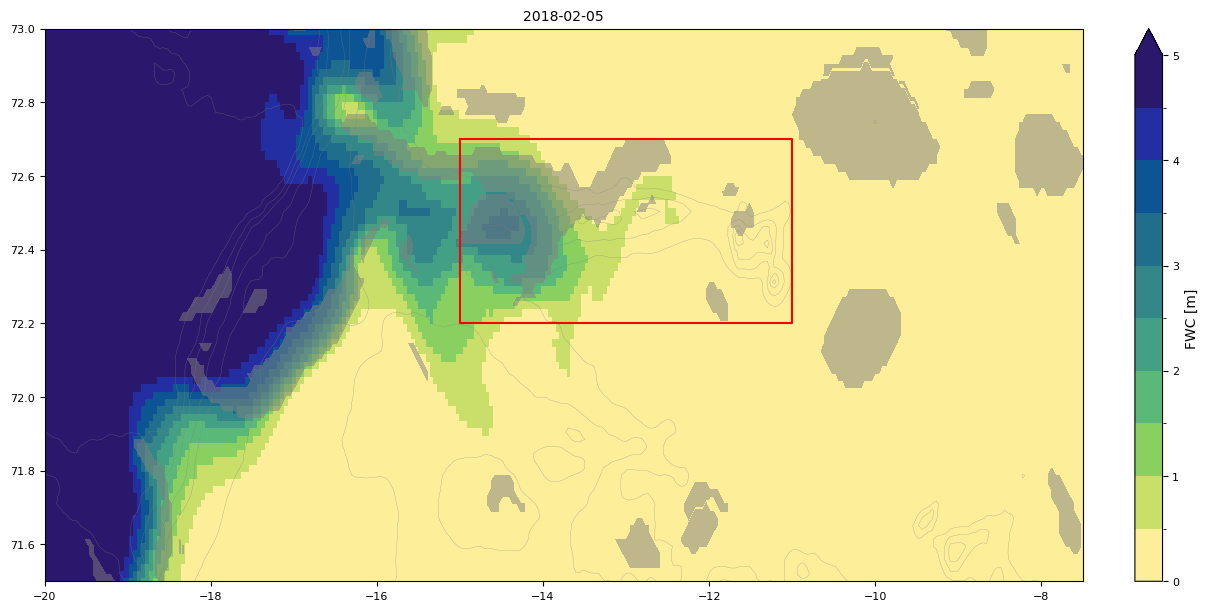

In [8]:
fig, ax = plt.subplots(
    figsize=(12,6), layout='constrained'
    #figsize=(6.2217,3), layout='constrained'
)

time = 157

bounds = np.linspace(0, 5, 11)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

ax.set_title(str(FWC.time.values[time])[0:10])

mesh = ax.pcolormesh(FWC.X,FWC.Y,FWC[time],cmap=cmo.haline_r,norm=norm)
cbar = fig.colorbar(mesh,extend='max')
cbar.set_label('FWC [m]')

lon = depth['XC']
lat = depth['YC']

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0)

# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0)
ax.contour(lon, lat, depth_no_nan, [300,400,500,750,1000,1500,2000], colors='grey', linewidths=0.25,alpha=0.7)

NJMR = [[-15,-11,-11,-15,-15],[72.7,72.7,72.2,72.2,72.7]]
ax.plot(NJMR[0],NJMR[1],c='red')

ax.contourf(eddyRegion.X,eddyRegion.Y,eddyRegion[time],[0,1.5],colors='grey',alpha=0.5)
ax.contourf(eddyRegion.X,eddyRegion.Y,eddyRegion[time],[3,4.5],colors='grey',alpha=0.5)

ax.set_ylim(71.5,73)
ax.set_xlim(-20,-7.5)


In [9]:
JMR_FWC = FWC.sel(Y=slice(72.2,72.7),X=slice(-15,-11))
JMR_area = area.sel(Y=slice(72.2,72.7),X=slice(-15,-11))
JMR_eddyRegion = eddyRegion.sel(Y=slice(72.2,72.7),X=slice(-15,-11))

In [17]:
JMR_FWC_Sum = JMR_FWC*JMR_area
JMR_FWC_Sum = JMR_FWC_Sum.sum(dim=['X','Y'])*10**(-9)

cond = (JMR_eddyRegion == 1)# | (JMR_eddyRegion == 4)
EJMR_FWC = JMR_FWC.where(cond)*JMR_area
EJMR_FWC = EJMR_FWC.sum(dim=['X','Y'])*10**(-9)
cond = (JMR_eddyRegion == 4)
OEJMR_FWC = JMR_FWC.where(cond)*JMR_area
OEJMR_FWC = OEJMR_FWC.sum(dim=['X','Y'])*10**(-9)

cond = (JMR_eddyRegion == 1) | (JMR_eddyRegion == 4)
CEJMR_FWC = JMR_FWC.where(cond)*JMR_area
CEJMR_FWC = CEJMR_FWC.sum(dim=['X','Y'])*10**(-9)

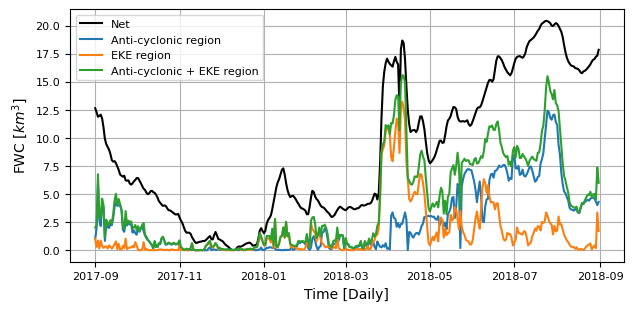

In [19]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)
ax.plot(JMR_FWC_Sum.time,JMR_FWC_Sum,c='k',label='Net')
ax.plot(EJMR_FWC.time,EJMR_FWC,label='Anti-cyclonic region')
ax.plot(OEJMR_FWC.time,OEJMR_FWC,label='EKE region')
ax.plot(CEJMR_FWC.time,CEJMR_FWC,label='Anti-cyclonic + EKE region')

ax.set_ylabel(f'FWC [$km^{3}$]')
ax.set_xlabel('Time [Daily]')
ax.grid()
ax.legend(loc='upper left')

fig.savefig(f'/nird/home/ekv036/MSc/Fig/JMR_EFWC',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)

In [20]:
from scipy import stats
res = stats.pearsonr(JMR_FWC_Sum,EJMR_FWC)
print(res,'p < 0.01: ',res[1]<0.01)
res = stats.pearsonr(JMR_FWC_Sum,OEJMR_FWC)
print(res,'p < 0.01: ',res[1]<0.01)
res = stats.pearsonr(JMR_FWC_Sum,CEJMR_FWC)
print(res,'p < 0.01: ',res[1]<0.01)

PearsonRResult(statistic=0.8265297391109052, pvalue=1.2837397397778033e-92) p < 0.01:  True
PearsonRResult(statistic=0.5016068361336233, pvalue=1.1807091857485094e-24) p < 0.01:  True
PearsonRResult(statistic=0.8876763627251338, pvalue=2.5970286429677106e-124) p < 0.01:  True


In [69]:
eddyRegion

<xarray.DataArray 'EddyDetection' (time: 365, Y: 198, X: 473)> Size: 273MB
array([[[ 4.,  4., ..., nan, nan],
        [ 4.,  4., ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[ 4.,  4., ..., nan, nan],
        [ 4.,  4., ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
    XC       (Y, X) float64 749kB ...
    YC       (Y, X) float64 749kB ...
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B ...
Attributes:
    unit:         Eddy type (1 == anti-cyclonic, 2 == cyclonic)
    description:  Outermost closed SSH defined eddy region

In [108]:
cond = (FWC > 2.5) & ((eddyRegion == 1)|(eddyRegion == 4))
space_corr = xr.corr(eddyRegion.where(cond),FWC,dim=['X','Y'])
time_corr = xr.corr(eddyRegion.where(cond),FWC,dim='time')

In [109]:
space_corr

<xarray.DataArray (time: 365)> Size: 3kB
array([ 5.25748897e-01,  5.34902253e-01,  5.51569731e-01,  4.73559582e-01,
        6.29017295e-01,  6.83643640e-01,  6.05889571e-01,  5.12108490e-01,
        5.12835264e-01,  5.74996651e-01,  5.46630441e-01,  6.08284654e-01,
        5.40454052e-01,  5.25618107e-01,  5.18700975e-01,  5.19993628e-01,
        5.04883626e-01,  5.35786700e-01,  5.03144937e-01,  4.50931887e-01,
        4.43970533e-01,  5.02456637e-01,  4.95405488e-01,  4.97619386e-01,
        5.59030648e-01,  4.25395188e-01,  4.66220381e-01,  5.87881162e-01,
        5.32065276e-01,  4.14563168e-01,  4.18832922e-01,  3.74058147e-01,
        3.18415135e-01,  3.64179647e-01,  3.09156375e-01,  1.76373171e-01,
        1.80886759e-01,  1.41623962e-01,  1.59286753e-01,  1.85850242e-01,
        2.46810064e-01,  1.70912959e-01,  1.64280487e-01,  1.17631309e-01,
        1.63383101e-01,  1.31242205e-01,  1.04295905e-01,  1.37844780e-01,
        9.19869831e-02,  1.27727811e-01,  1.46680490e-01,  1.69414493e-01,
        8.92942744e-02,  7.51030093e-02,  8.39870271e-02,  7.11060952e-02,
        3.79693976e-02,  1.31532728e-02, -1.03495296e-02,  4.10964790e-02,
        2.56299435e-02, -1.42956703e-02,  3.68286648e-02,  2.24528214e-02,
        2.82232961e-02, -1.42835707e-02,  1.78329271e-02,  2.10130529e-02,
        4.21541028e-02, -6.02696389e-04, -4.37024005e-02,  2.58080422e-02,
        5.84425258e-02,  4.05389514e-02,  2.80027402e-02,  4.31719179e-02,
        3.22011007e-03,  5.95264123e-02,  4.03487703e-02,  3.27424641e-02,
...
        1.17081819e-02,  1.69226096e-01,  4.99943242e-02, -2.93644025e-02,
        8.66181852e-02,  1.96294989e-01,  1.18108269e-01,  1.58871211e-01,
        1.34935543e-01,  1.88596706e-01,  2.98120752e-01,  2.12179435e-01,
        1.74677948e-01,  1.56592252e-01,  2.30362501e-01,  3.61576927e-01,
        6.80411183e-02,  4.32934032e-02,  5.27953900e-02,  3.12709504e-01,
        2.90753467e-01,  1.55817748e-01,  1.50456743e-01,  1.63881650e-01,
        2.17021863e-01,  2.86721154e-01,  3.23624724e-01,  3.05164172e-01,
        1.34437414e-01,  1.87665970e-01,  1.84567915e-01,  2.02734295e-01,
        1.83070811e-01,  1.33712486e-01,  1.70015122e-01,  2.57811752e-01,
        2.73088508e-01,  2.90431250e-01,  1.25368244e-01,  3.05978887e-01,
        2.77349783e-01,  1.44211058e-01, -4.23931609e-02,  2.87786698e-02,
        3.12614616e-01,  2.40624682e-01,  3.21683565e-01,  3.47971603e-01,
        2.81500830e-01,  1.18716900e-01,  1.47647986e-01,  2.70808464e-01,
        2.09499404e-01,  8.68840235e-02,  3.84767378e-02,  5.05207651e-02,
        1.07634514e-01,  1.34264885e-01,  2.03794036e-02,  8.95825729e-02,
        7.14032917e-02,  4.92856633e-02,  9.18274543e-03,  2.90813199e-01,
        2.98582919e-01,  4.64906363e-02,  7.91609537e-02,  2.53845856e-01,
        1.75997676e-01,  2.29044509e-01,  2.52645975e-01,  2.20442585e-01,
        2.27671665e-01,  1.94431617e-01,  2.38352643e-01,  9.96265416e-02,
        1.43757472e-01])
Coordinates:
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B -1.0

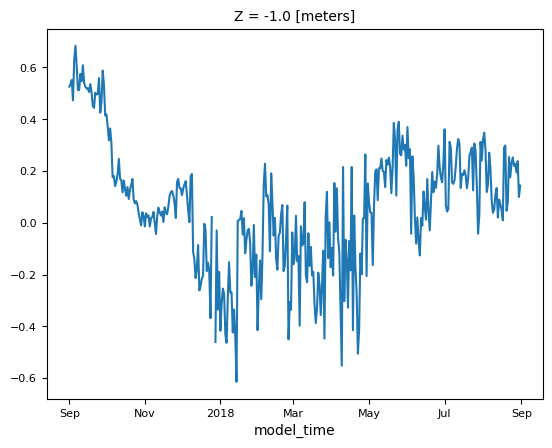

In [110]:
space_corr.plot()

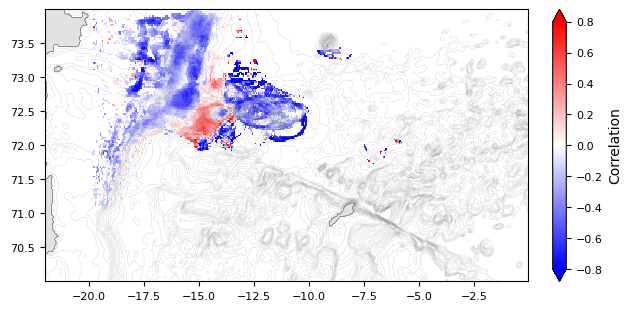

In [111]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)

mesh = ax.pcolormesh(time_corr.X,time_corr.Y,time_corr,vmin=-0.8,vmax=0.8,cmap='bwr')
cbar = fig.colorbar(mesh,extend='both')
cbar.set_label('Correlation')
lon = depth['XC']
lat = depth['YC']

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0)

# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0)
ax.contour(lon, lat, depth_no_nan, np.arange(0,3000,100), colors='grey', linewidths=0.15,alpha=0.7)

fig.savefig(f'/nird/home/ekv036/MSc/Fig/JMR_EDDY_FWC_Correlation',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)

# Case study of eddy ID with high FWC

In [ ]:
case_EddyAreaID = JMREI.sel(Y=slice(72.2,72.7),X=slice(-15,-11))
case_EddyAreaID = case_EddyAreaID.assign_coords(time=JMR_FWC.time.values)

In [ ]:
case_EddyAreaID = case_EddyAreaID.where(JMR_FWC>=3)
case_EddyAreaID = case_EddyAreaID.fillna('0')

In [ ]:
display(np.unique(case_EddyAreaID.values))

array(['0', "['15']", "['1578']", "['17']", "['17a']", "['17b']",
       "['18']", "['1979aabb', '1979babb', '1979bbbb', '1979abbb']",
       "['1979aabbb', '1979abbbb', '1979bbbbb', '2472', '1979babbb']",
       "['1979aabbb', '1979babbb', '1979bbbbb', '1979abbbb']",
       "['1979aabbb', '1979bbbbb', '1979abbbb', '1979babbb']", "['2120']",
       "['2136']", "['2191']", "['2205']", "['2209']", "['2308']",
       "['2318']", "['2449b', '2464b', '2596', '2873']",
       "['2449b', '2464b', '2596']", "['2449b', '2464b']",
       "['2449b', '2873', '2596', '2464b']", "['2460']", "['2487']",
       "['2596']", "['2613']", "['2642']", "['2900']", "['30']",
       "['3007']", "['3022']", "['3148']", "['6161']"], dtype=object)

In [ ]:
with open('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/ID_in_time.json', 'r') as f:
    ID_in_time = json.load(f)

In [ ]:
display(ID_in_time[1979-1])

[[[1979], [0], [-12.165578744999994], [72.65581885499999], [195], [0]],
 [[1979], ['a'], [-12.209000324999993], [72.65581885499999], [196], [0]],
 [[1979], ['b'], [-11.515520994999992], [72.65581885499999], [196], [0]],
 [[1979], [0], [-13.080454489999996], [72.43890108], [197], [0]],
 [[1979], [0], [-13.167971574999996], [72.43890108], [198], [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.515520994999992],
  [72.58998643999999],
  [198],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.515520994999992],
  [72.58998643999999],
  [198],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.645367309999994],
  [72.58998643999999],
  [199],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.645367309999994],
  [72.58998643999999],
  [199],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.602077389999993],
  [72.61185646999999],
  [200],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.602077389999993],
  [72.61185646999999],
  [200],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.212786989999993],
  [72.61185646999999],


In [ ]:
# Convert list entries to tuples for uniqueness checks and collect unique tuples
unique_tuples = {tuple(map(tuple, sublist)) for sublist in ID_in_time[1979-1]}

# Convert unique tuples back to lists
unique_lists = [list(map(list, unique_tuple)) for unique_tuple in unique_tuples]

In [ ]:
display(len(unique_lists),unique_lists)

182

[[[1979, 1979, 1979, 1979],
  ['aabb', 'babb', 'bbbb', 'abbb'],
  [-11.688665464999993],
  [72.52481184999999],
  [214],
  [0]],
 [[1979, 1979, 1979, 2472, 1979],
  ['aabbb', 'abbbb', 'bbbbb', 0, 'babbb'],
  [-11.948644934999994],
  [72.333038035],
  [247],
  [0]],
 [[1979, 2472, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['aabbba',
   'a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babbba',
   'bbbbbb',
   'b',
   'bbbbba'],
  [-10.43522238],
  [71.38875489499999],
  [330],
  [0]],
 [[2472, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babbba',
   'bbbbbb',
   'bbbbba',
   'b',
   'aabbba'],
  [-10.651150549999992],
  [71.44451680499998],
  [315],
  [0]],
 [[2472, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babbba',
   'bbbbbb',
   'bbbbba',
   'b',
   'aabbba'],
  [-10.348850025],
  [71.37024998499999],
  [337],
  [0]

In [ ]:
for i in unique_lists:
    if i == [[1979], [0], [-12.165578744999994], [72.65581885499999], [195], [0]]:
        print('Yes',i)
        break

Yes [[1979], [0], [-12.165578744999994], [72.65581885499999], [195], [0]]


In [ ]:
time = []
for timestep in unique_lists:
    time.append(timestep[-2])

time_ = np.arange(np.max(time)-np.min(time)+1)
ID_1979 = [[] for data in time_]

minTime = np.min(time)

for ID in unique_lists:
    ID_1979[int(ID[-2][0])-int(minTime)].append(ID)

19
52
135
120
142
139
53
165
42
39
129
88
116
0
46
112
154
147
110
16
155
66
24
87
13
50
114
128
28
127
157
84
92
118
83
144
100
44
134
1
51
3
111
85
160
56
136
73
146
45
68
78
150
156
94
23
32
1
54
25
63
137
169
64
158
59
23
132
17
27
35
17
12
20
15
167
96
6
28
67
38
121
152
149
9
47
153
77
11
59
69
79
126
55
89
104
105
151
159
99
81
90
93
57
161
34
123
8
107
130
113
75
10
58
82
3
115
62
76
138
80
97
124
70
65
91
101
5
22
162
163
143
148
33
122
14
119
145
72
22
40
131
30
29
164
71
41
109
48
58
95
102
98
4
168
74
125
140
49
141
106
20
26
166
133
7
2
19
14
108
117
30
21
43
61
86
18
37
103
36
60
21


[[[1979, 2472, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['aabbba',
   'a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babbba',
   'bbbbbb',
   'b',
   'bbbbba'],
  [-10.867105779999994],
  [71.18737249499999],
  [364],
  [0]]]

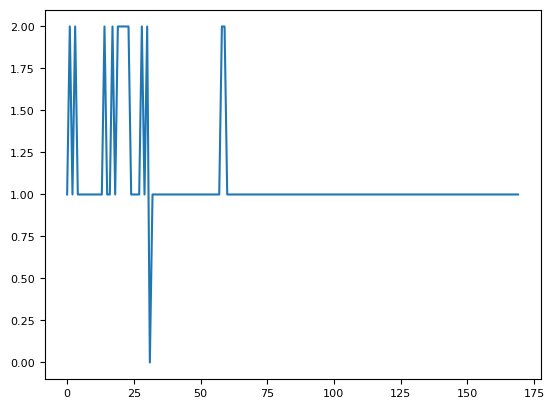

In [ ]:
display(ID_1979[-1])
plt.plot([len(i) for i in ID_1979])

/tmp/ipykernel_1205773/1498225442.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


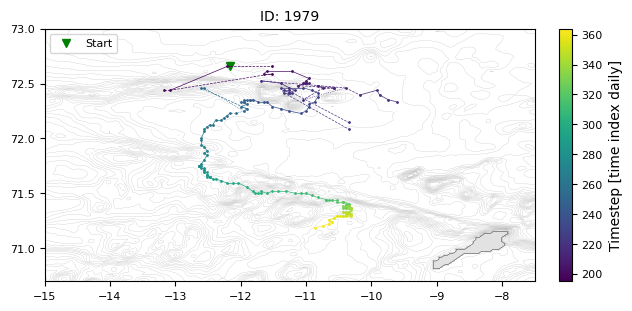

In [ ]:


fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)

cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(min(subdata[-2][0] for data in ID_1979 for subdata in data), max(subdata[-2][0] for data in ID_1979 for subdata in data))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Timestep [time index daily]')
#cbar.set_ticklabels(JMR_FWC.time.values[min(subdata[-2][0] for data in ID_1979 for subdata in data):max(subdata[-2][0] for data in ID_1979 for subdata in data)+1])

lon = depth['XC']
lat = depth['YC']

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0)

# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0)
ax.contour(lon, lat, depth_no_nan, np.arange(0,3000,100), colors='grey', linewidths=0.15,alpha=0.7)

for i,data in enumerate(ID_1979):
    for subdata in data:
        color = cmap(normalize(subdata[-2][0]))
        if i == 0:
            ax.plot(subdata[2],subdata[3],marker='v',linestyle='',c='green',label='Start')
        else:
            ax.plot(subdata[2],subdata[3],marker='o',markersize=1,c=color)

            # Add contourf of eddy
            eddyRegion

            # Draw line from pre
            pre = ID_1979[i-1]
            if len(pre) == 0:
                pre = ID_1979[i-2]
            if len(pre) == 1 and len(data) == 1:
                ax.plot([pre[0][2],subdata[2]],[pre[0][3],subdata[3]],c=color,linewidth=0.5)
            elif len(pre) == 1 and len(data) != 1:
                ax.plot([pre[0][2],subdata[2]],[pre[0][3],subdata[3]],c=color,linewidth=0.5,linestyle='--')
            elif len(pre) != 1:
                connected_index = []
                for index,subpre in enumerate(pre):
                    dist = gsw.distance([subpre[2][0],subdata[2][0]],[subpre[3][0],subdata[3][0]])
                    if dist < 40000:
                        connected_index.append(index)
                if len(connected_index) != 0:
                    if len(connected_index) == 1:
                        ax.plot([pre[connected_index[0]][2],subdata[2]],[pre[connected_index[0]][3],subdata[3]],c=color,linewidth=0.5)
                    else:
                        for index,subpre in enumerate(pre):
                            if any(connected_index) == index:
                                ax.plot([subpre[2],subdata[2]],[subpre[3],subdata[3]],c=color,linewidth=0.5,linestyle='dotted')

    ax.set_xlim(-15,-7.5)
    ax.set_ylim(70.7,73)
    ax.set_title('ID: 1979')
    ax.legend(loc='upper left')
    fig.savefig(f'/nird/home/ekv036/MSc/Fig/EddyTracking/ID1979/ID1979_{i}',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)





fig.savefig(f'/nird/home/ekv036/MSc/Fig/EddyTracking/ID1979_full',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)


In [ ]:
from PIL import Image
import os

# Define the folder containing the PNG files and the output GIF file
input_folder = '/nird/home/ekv036/MSc/Fig/EddyTracking/ID1979'
output_gif = '/nird/home/ekv036/MSc/Animations/ID_1979.gif'

# Get a list of all PNG files in the folder
png_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]

# Extract numeric index from file name and sort accordingly
png_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

# Open the images and store them in a list
images = [Image.open(os.path.join(input_folder, file)) for file in png_files]

# Save the images as a GIF
images[0].save(output_gif, save_all=True, append_images=images[1:], optimize=False, duration=200, loop=0)

print(f"GIF saved as {output_gif}")

GIF saved as /nird/home/ekv036/MSc/Animations/ID_1979.gif
